In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
sia = SentimentIntensityAnalyzer()


def get_compound_sentiment_score(text):
    return sia.polarity_scores(text).get('compound')

import nltk
nltk.download()

In [2]:
data_path = rf'C:\Users\maxks\.cache\kagglehub\datasets\snap\amazon-fine-food-reviews\versions\2'
df = pd.read_csv(rf'{data_path}/Reviews.csv')

In [66]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'helpfulness_ratio'],
      dtype='object')

In [ ]:
df['Time'].quantile(0.90)

np.float64(1344470400.0)

In [70]:
df[['ProductId', 'Score']].groupby('ProductId')

In [28]:
split_time = 1344470400.0
train_df = df.loc[df['Time'] <= split_time].copy()
test_df = df.loc[df['Time'] > split_time].copy()

In [73]:
train_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,combined_text,vader_senti_combined,helpfulness_ratio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food\nI have bought several o...,0.9583,1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all\nThis is a confection th...",0.8265,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine\nIf you are looking for the sec...,0.0000,1.0
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,Nice Taffy\nI got a wild hair for taffy and or...,0.9199,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Great! Just as good as the expensive brands!\...,0.9711,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Will not do without\nGreat for sesame chicken....,0.7959,NaN
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,disappointed\nI'm disappointed with the flavor...,-0.6365,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Perfect for our maltipoo\nThese stars are smal...,0.7630,1.0
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Favorite Training and reward treat\nThese are ...,0.9853,1.0


In [75]:
train_df.loc[train_df['ProductId']=='B001EO7N10']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,combined_text,vader_senti_combined,helpfulness_ratio
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...","Best Value for Chinese 5 Spice\nAs a foodie, I...",0.9059,1.0
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",Five Spice Powder\nYou can make this mix yours...,0.5251,1.0
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...,Mixed wrong\nI had ordered some of these a few...,-0.1027,NaN
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex...","If its all natural, this is like panacea of Sp...",0.9272,NaN
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...,Very large ground spice jars.\nMy only complai...,-0.0675,NaN
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Will not do without\nGreat for sesame chicken....,0.7959,NaN


In [39]:
train_df['Summary'].fillna('', inplace=True)

In [44]:
train_df['Summary'] = train_df['Summary'].astype('str')
train_df['Text'] = train_df['Text'].astype('str')

In [45]:
train_df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               23
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
combined_text              0
dtype: int64

In [46]:
train_df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
combined_text             object
dtype: object

In [47]:
train_df['combined_text'] = train_df['Summary'] + '\n' + train_df['Text']

In [48]:
train_df['vader_senti_combined'] = train_df['combined_text'].apply(get_compound_sentiment_score)

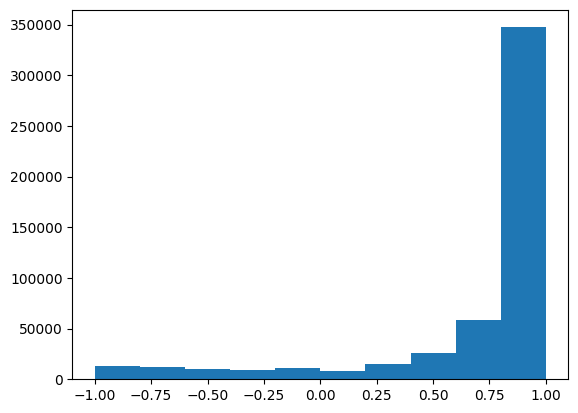

In [50]:
plt.hist(train_df['vader_senti_combined']);

In [52]:
train_df[['Score', 'vader_senti_combined']].corr()

,Score,vader_senti_combined
Score,1.000000,0.563614
vader_senti_combined,0.563614,1.000000


In [65]:
train_df[['Score', 'vader_senti_combined', 'HelpfulnessNumerator', 'Text', 'Summary']].head(10)

,Score,vader_senti_combined,HelpfulnessNumerator,Text,Summary
0,5,0.9583,1,I have bought several of the Vitality canned d...,Good Quality Dog Food
2,4,0.8265,1,This is a confection that has been around a fe...,"""Delight"" says it all"
3,2,0.0000,3,If you are looking for the secret ingredient i...,Cough Medicine
5,4,0.9199,0,I got a wild hair for taffy and ordered this f...,Nice Taffy
6,5,0.9711,0,This saltwater taffy had great flavors and was...,Great! Just as good as the expensive brands!
7,5,0.9653,0,This taffy is so good. It is very soft and ch...,"Wonderful, tasty taffy"
8,5,0.8225,1,Right now I'm mostly just sprouting this so my...,Yay Barley
10,5,0.9787,1,I don't know if it's the cactus or the tequila...,The Best Hot Sauce in the World
11,5,0.3254,4,One of my boys needed to lose some weight and ...,"My cats LOVE this ""diet"" food better than thei..."
12,1,0.2960,1,My cats have been happily eating Felidae Plati...,My Cats Are Not Fans of the New Food


<Axes: xlabel='Score', ylabel='vader_senti_combined'>

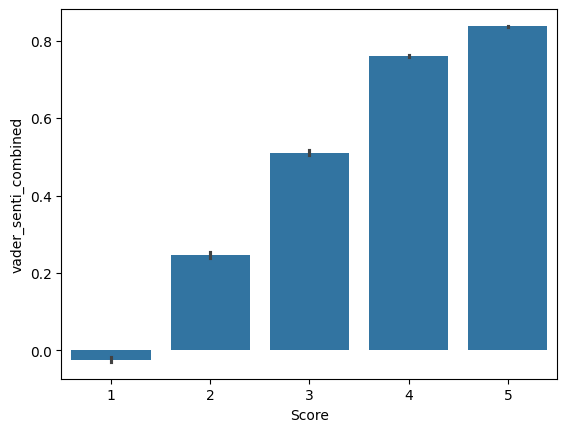

In [77]:
sns.barplot(data=train_df, x='Score', y='vader_senti_combined')

In [59]:
train_df['helpfulness_ratio'] = train_df['HelpfulnessNumerator'] / train_df['HelpfulnessDenominator']

In [ ]:
train_df[''].head(10)

0     1
2     1
3     3
5     0
6     0
7     0
8     1
10    1
11    4
12    1
Name: HelpfulnessNumerator, dtype: int64

In [64]:
train_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'combined_text', 'vader_senti_combined', 'helpfulness_ratio'],
      dtype='object')

<Axes: xlabel='Score', ylabel='Count'>

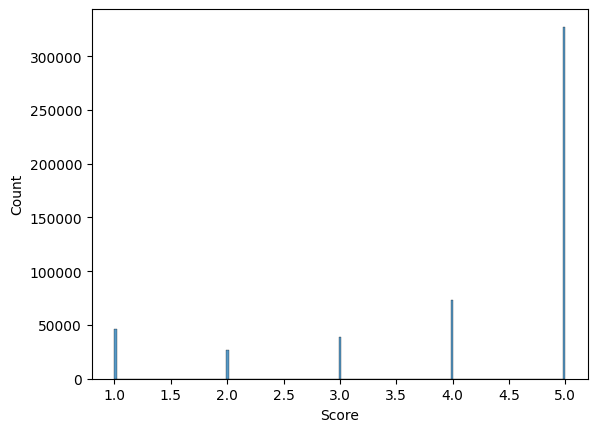

In [ ]:
sns.histplot(train_df['Score'])

In [17]:
get_compound_sentiment_score('This is the worst thing ever. Cant be any worst')

-0.8481

- HelpfulnessNumerator: Number of users who found the review helpful
- HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not

sns.boxplot(data=train_df, x='vader_senti_combined', y='Score')

In [83]:
train_df.groupby('Score')['vader_senti_combined'].agg(['mean', 'median', 'std'])

,mean,median,std
Score,,,
1,-0.024204,-0.0527,0.672285
2,0.247227,0.4349,0.639381
3,0.511132,0.7579,0.542606
4,0.761518,0.9030,0.360942
5,0.837270,0.9280,0.270386
